In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_model_for_classification import (
LeastSquareClassifier,
FisherLinearDiscriminant,
LogisticRegression,
SoftmaxRegression,
BayesLogisticRegression
)
from linear_model_for_regression import Polynomial
np.random.seed(100)

In [2]:
def create_data(size=50, add_outlier=False, add_class=False):
    assert size % 2 == 0
    x0 = np.random.normal(size=size).reshape(-1, 2) - 1
    x1 = np.random.normal(size=size).reshape(-1, 2) + 1
    if add_outlier:
        x = np.random.normal(size=10).reshape(-1, 2) + np.array([5, 10])
        return np.concatenate([x0, x1, x]), np.concatenate([np.zeros(size//2), np.ones(size//2 + 5)])
    if add_class:
        x = np.random.normal(size=size).reshape(-1, 2) + 3
        return np.concatenate([x0, x1, x]), np.concatenate([np.zeros(size//2), np.ones(size//2), 2*np.ones(size//2)])
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(size//2), np.ones(size//2)])

### 1.3 Least Square

In [3]:
x_train, y_train = create_data()
feature = Polynomial(degree=1)
model = LeastSquareClassifier()
model.fit(feature(x_train), y_train, batch_size=5, epochs=60, lr=1e-3, use_SGD=True)
model1 = LeastSquareClassifier()
model1.fit(feature(x_train), y_train)

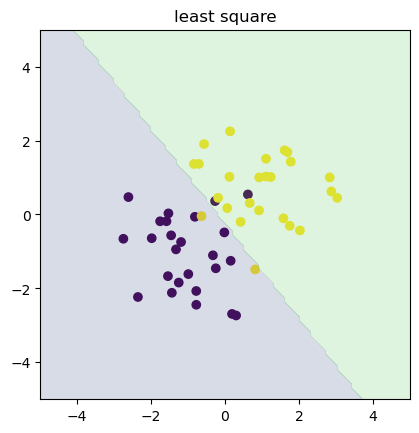

In [4]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.concatenate([x1_test, x2_test]).reshape(2, -1).T
y_pred = model.classify(feature(x_test))
plt.contourf(x1_test, x2_test, y_pred.reshape(100, -1), alpha=0.2, levels=np.linspace(0,1,3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('least square')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 1.4 Fisher discriminant function

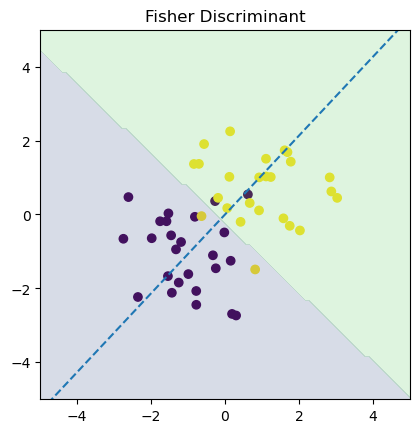

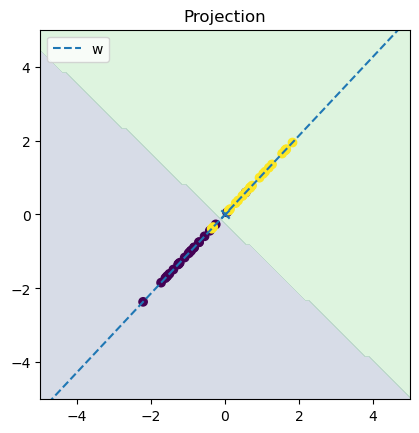

In [5]:
model = FisherLinearDiscriminant()
model.fit(x_train, y_train)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.concatenate([x1_test, x2_test]).reshape(2, -1).T
y_pred = model.classify(x_test)
x = np.linspace(-5, 5, 20)
plt.contourf(x1_test, x2_test, y_pred.reshape(100, -1), alpha=0.2, levels=np.linspace(0,1,3))
plt.plot(x, x * model.w[1]/model.w[0], label='w', linestyle='--')
plt.title('Fisher Discriminant')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

plt.plot(x, x * model.w[1]/model.w[0], label='w', linestyle='--')
w = model.w
rollmat = np.zeros((2,2))
div = np.sqrt(w[0] ** 2 + w[1] ** 2)
rollmat[0,0] = w[0]/div
rollmat[0,1] = w[1]/div
rollmat[1,0] = -w[1]/div
rollmat[1,1] = w[0]/div
x_proj = x_train@w
x_proj = np.concatenate([x_proj[:,None], np.zeros_like(x_proj[:,None])],axis=-1).reshape(-1, 2)
#plt.scatter(x_proj[:,0], x_proj[:,1]-5, c=y_train)
x_roll = x_proj @ rollmat
plt.contourf(x1_test, x2_test, y_pred.reshape(100, -1), alpha=0.2, levels=np.linspace(0,1,3))
plt.scatter(x_roll[:, 0], x_roll[:,1], c=y_train)
plt.scatter(0, 0, marker='x', alpha=1)
plt.title('Projection')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()
plt.show()

### 2.1 Logistic Regression

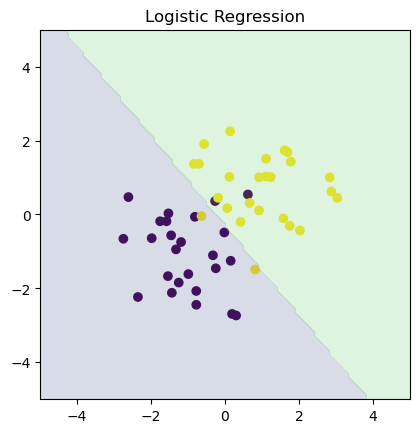

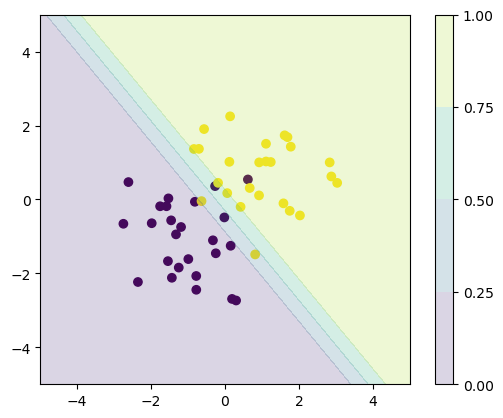

In [6]:
model_lr = LogisticRegression()
model_lr.fit(feature(x_train), y_train)
y_pred = model_lr.classify(feature(x_test))
y_prob = model_lr.prob(feature(x_test))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_pred.reshape(100, -1), alpha=0.2, levels=np.linspace(0,1,3))
plt.title('Logistic Regression')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_prob.reshape(100, -1), alpha=0.2, levels=np.linspace(0,1,5))
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

### 2.2 Softmax Regression

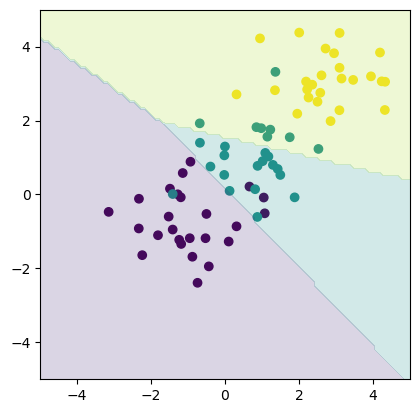

In [7]:
multi_x_train, multi_y_train = create_data(add_class=True)
plt.scatter(multi_x_train[:, 0], multi_x_train[:, 1], c=multi_y_train)
model_sr = SoftmaxRegression()
model_sr.fit(feature(multi_x_train), multi_y_train, max_iter=1000)
y_prob = model_sr.prob(feature(x_test))
y_pred = model_sr.classify(feature(x_test))
plt.contourf(x1_test, x2_test, y_pred.reshape(100, -1), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

### 2.3 Bayes Logistic Regression

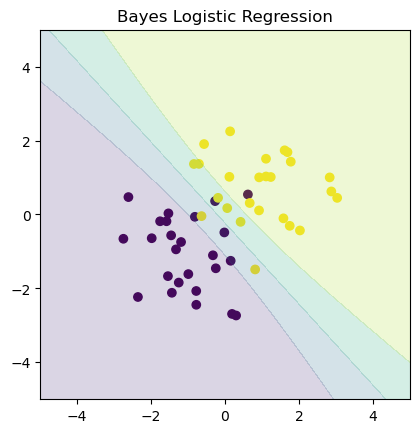

In [11]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
model = BayesLogisticRegression()
model.fit(feature(x_train), y_train)
y_prob = model.prob(feature(x_test))
plt.contourf(x1_test, x2_test, y_prob.reshape(100, -1), alpha=0.2, levels=np.linspace(0,1,5))
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Bayes Logistic Regression")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()